# Visualisation of `RWC_alam`

*Arthur Ryman*
*Last Updated: 2022-05-14*

## Introduction

I am testing `acmpy`.
The function `RWC_alam` minimises an certain energy expectation function.
The test case for `RWC_alam(B, -3, 2)` passes for $1 \le B \le 15$ but fails for $B \ge 15$.
The Maple version passes for all values of $B$.

The Python version uses the SymPy function `solveset`.
This a bug because it incorrectly reports the empty set.
The correct behavior is to report a `ConditionSet` if it can't find the solution.

What is going on here?

Try plotting the function that is being optimised.

In [1]:
import math
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 10)

In [2]:
%matplotlib inline

## Mathematical Specification

The mathematical theory for ACM is described in \[WR2015\].

The function `RWC_alam` minimizes the expectation value of the RWC Hamiltonian defined by the real parameters $B$, $c_1$, $c_2$, and $\kappa$. 
We are interested in the case:

$$
\begin{gather}
B > 0 \\
c_1 = -3 \\
c_2 = 2 \\
\kappa = 0
\end{gather}
$$

In [3]:
B = B_DEFAULT = 15
c1 = c1_DEFAULT = -3
c2 = c2_DEFAULT = 2
kappa = kappa_DEFAULT = 0

The test cases pass for $1 \le B \le 14$ and fail for $B \ge 15$.

### $\beta_0(c_1, c_2)$

The parameter $\beta_0$ is defined in (B.15).

$$
\beta_0(c_1, c_2) = 
\left\{ 
\begin{array}{ll}
\sqrt{-\frac{c_1}{2 c_2}} & \mbox{if $c_1 < 0$} \\
0 & \mbox{otherwise}
\end{array}
\right.
$$

In [4]:
def beta0_fn(c1: float = c1_DEFAULT, c2: float = c2_DEFAULT) -> float:
    """(B.15)"""
    assert c2 > 0.0
    return 0.0 if c1 >= 0 else math.sqrt(-c1 / (2 * c2))

beta0 = beta0_DEFAULT = beta0_fn()
beta0

0.8660254037844386

### $\lambda_0(a, \beta_0)$

The parameter $\lambda_0$ is defined in (B.11).

$$
\lambda_0 = 1 + \sqrt{9/4 + (a \beta_0)^4}
$$

In [5]:
def lambda0_fn(a: float, beta0: float = beta0_DEFAULT) -> float:
    """(B.11)"""
    assert beta0 > 0.0
    return 1 + math.sqrt(9 / 4 + (a * beta0) ** 4)

I am going to plot $\lambda_0$ as a function of $a$.
Create an index of $a$ values and a dataframe for $\lambda_0$.

In [6]:
a_index = pd.Index(np.arange(0.5, 20.5, 0.5, dtype=np.float64), name='a')
lambda0_df = pd.DataFrame(index=a_index)

Compute and plot $\lambda_0$ versus $a$.

<AxesSubplot:xlabel='a'>

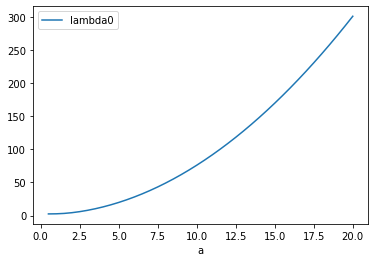

In [7]:
lambda0_df['lambda0'] = [lambda0_fn(a, beta0) for a in a_index]
lambda0_df.plot()

For small $a$ we have:

$$
\begin{split}
\lambda_0
& = 1 + \sqrt{9/4 + (a \beta_0)^4} \\
& \approx 1 + \sqrt{9/4} \\
& = 1 + 3/2 \\
& = 5/2
\end{split}
$$

Compute and plot the behaviour of $\lambda_0(a)$ for small $a$.

<AxesSubplot:xlabel='a'>

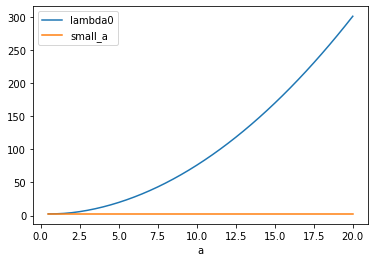

In [8]:
lambda0_df['small_a'] = 5 / 2
lambda0_df.plot()

For large $a$ we have:

$$
\begin{split}
\lambda_0
& = 1 + \sqrt{9/4 + (a \beta_0)^4} \\
&\approx (a \beta_0)^2
\end{split}
$$

Compute and plot the behavior of $\lambda_0(a)$ for large $a$.

<AxesSubplot:xlabel='a'>

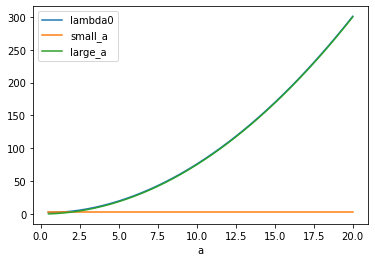

In [9]:
lambda0_df['large_a'] = [(a * beta0) ** 2 for a in a_index]
lambda0_df.plot()

The curve for approximation of $\lambda_0(a)$ for large $a$ is visually indistinguishable from that for the exact value of $\lambda_0(a)$ when plotted on a linear $y$-axis, so use a log $y$-axis instead.

<AxesSubplot:xlabel='a'>

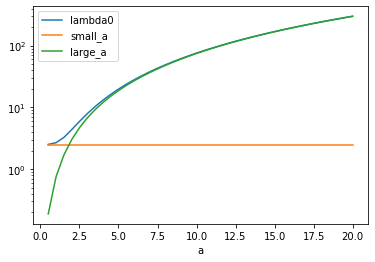

In [10]:
lambda0_df.plot(logy=True)

### $E(a, \lambda_0, B, c_1, c_2, \kappa)$

Let $E$ denote the expectation value of the RWC Hamiltonian operator acting on the ground state. 
The value E is defined in (B.16).
It is the sum of contributions from four operators.

$$
\begin{align}
E_1 &= \frac{a^2}{2B}\left[ 1 + \frac{9}{4(\lambda_0 - 1)} \right] \\
E_2 &= \frac{B}{2 a^2}c_1 \lambda_0 \\
E_3 &= \frac{B}{2 a^4}c_2 \lambda_0(\lambda_0 + 1) \\
E_4 &= \frac{\kappa}{3} \\
E &= E_1 + E_2 + E_3 + E_4
\end{align}
$$

In [11]:
def E_fn(a: float, lambda0: float, 
         B: float = B_DEFAULT, 
         c1: float = c1_DEFAULT, 
         c2: float = c2_DEFAULT, 
         kappa: float = kappa_DEFAULT
        ) -> float:
    """(B.16)"""
    E1: float = (a ** 2 / (2 * B)) * (1 + 9 / (4 * (lambda0 - 1)))
    E2: float = B * c1 * lambda0 / (2 * a ** 2)
    E3: float = B * c2 * lambda0 * (lambda0 + 1) / (2 * a ** 4)
    E4: float = kappa / 3
    return E1 + E2 + E3 + E4

<AxesSubplot:xlabel='a'>

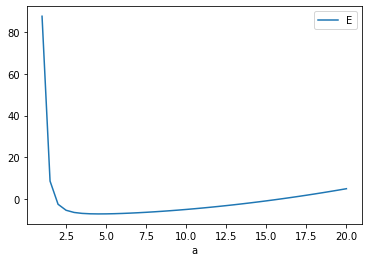

In [12]:
E_df = pd.DataFrame(index=a_index)
E_df['E'] = [E_fn(a, lambda0_fn(a)) for a in a_index]
E_df[1:].plot()

For small $a$, $\lambda_0 \approx 5/2$ so the contribution from $E_3$ dominates.

$$
\begin{split}
E
& \approx E_3 \\
& = \frac{B}{2 a^4}c_2 \lambda_0(\lambda_0 + 1) \\
& \approx \frac{B}{2 a^4}c_2 (5/2)(7/2) \\
& = \frac{35 B}{8 a^4}c_2
\end{split}
$$

<AxesSubplot:xlabel='a'>

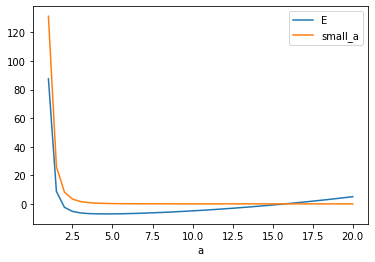

In [13]:
E_df['small_a'] = [35 * B * c2 / (8 * a ** 4) for a in a_index]
E_df[1:].plot()

For large $a$, $\lambda_0 \approx (a \beta_0)^2$ so the contribution from $E_1$ dominates.

$$
\begin{split}
E
& \approx E_1 \\
& = \frac{a^2}{2B}\left[ 1 + \frac{9}{4(\lambda_0 - 1)} \right] \\
& \approx \frac{a^2}{2B}\left[ 1 + \frac{9}{4((a \beta_0)^2 - 1)} \right] \\
& \approx \frac{a^2}{2B}
\end{split}
$$

<AxesSubplot:xlabel='a'>

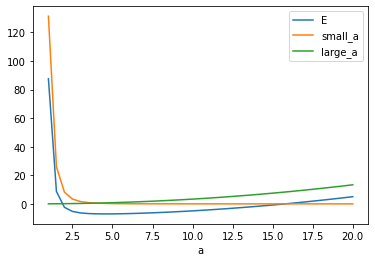

In [14]:
E_df['large_a'] = [a ** 2 / (2 * B) for a in a_index]
E_df[1:].plot()

<AxesSubplot:xlabel='a'>

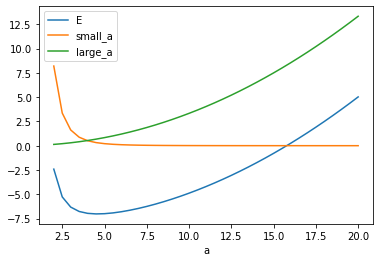

In [19]:
E_df[2:].plot(logy=False)

Clearly, $E(a, \lambda_0(a))$ has a negative slope for small $a$ and a positive slope for large $a$.
Therefore, $E(a, \lambda_0(a))$ has zero slope for at least one intermediate value and so
$E(a)$ must have a minimum for some finite, positive value of $a$.

Next plot $E(a, \lambda_0(a), B)$ versus $a$ for several values of $B$.

## $E(a, \lambda_0(a), B)$ for Varying $B$

Plot the $E$ curves for several values of $B$ around 14 and 15.
Is there a qualitative change in the shape of the curves?

In [16]:
def makeEB_df(a_min = 1.5, a_max = 20.0, a_step = 0.5, 
              B_min = 10, B_max = 20, B_step = 2, 
              c1 = c1_DEFAULT, c2 = c2_DEFAULT, kappa = kappa_DEFAULT):
    a_index = pd.Index(np.arange(a_min, a_max, a_step, dtype=np.float64), name='a')
    beta0 = beta0_fn(c1, c2)
    lambda0s = [lambda0_fn(a, beta0) for a in a_index]
    Bs = np.arange(B_min, B_max + B_step, B_step)
    EB_df = pd.DataFrame(index=a_index)
    for B in Bs:
        name = f'B={B}'
        Es = [E_fn(a, lambda0, B, c1, c2, kappa) for a, lambda0 in zip(a_index, lambda0s)]
        EB_df[name] = Es
    
    return EB_df

<AxesSubplot:xlabel='a'>

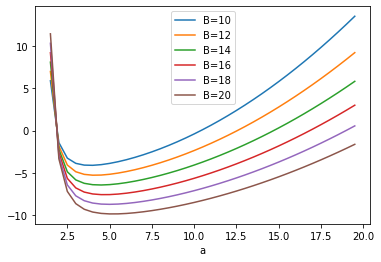

In [21]:
EB_df = makeEB_df()
EB_df.plot()

### Observation

There is no apparent qualitative change in behaviour as $B$ varies.
The bug in `solveset` remains a mystery.